### Context:
In this assignment I tried to address the following question:
What can we learn about gentrification in Austin, Texas based on public datasets?

While there was no sufficient available data for my desired area of investigation (Jerusalem)* , I reckoned that there will be rich dataset for this investigation for other cities, based on which some conclusions (but not all) could be generalized. The lack of the perfect dataest for Jerusalem is perhaps not so surprising. As it was put by Douglass B. Lee Jr. in Requiem for Large Scale Models: <br>
 <br>
_'Data constitute the window through which the model
views a city. Strong theory can extract much from these
data, but it cannot add new information. It is sometimes helpful to consider what a model ought to know
in order to produce a given output, before asking for the output.'_ (1973).

Some blind spots still remain valid even today, 2018. That said, with the exponential growth of data globaly we can assume that this trend will shrink eventually.

In regards to visualization: I started this assignment by focusing on necessarily using D3.js. This was a mistake – often times a common mistake by datascientist is to fit a problem onto a specific tool, instead the exact opposite. Perhaps the first step after scoping and defining the problem should be deciding what we want to say, and what kind of graph we should pick based on that, regardless of a specific tool, as was put by Peter Aldhous (2016 http://paldhous.github.io/ucb/2016/dataviz/). After my first experience with D3.js, which generated very humble outcomes, I decided to be more strategic with my tools for this assignment and used a combination of python libraries (matplotlib), Plotly, and editing tools like sublime and VScode. I was not only able to create the figures brought in this notebook, but also create an interactive map exploring the dataset that entails shooting in Austin, combined with the dataset depicting changes in each zipcode! <br>
The map is [here]( https://oba2311.github.io/). I will analyze this map shortly after exploring the data.

Whiel the data and the scope of the project may not be rich enough to determine unequivocally the causes of segregation in Austin (or elsewhere, as a casestudy), it is sufficient to illustrate how exploration can be done starting from the data, interwoven with theory to point at high-potential areas for investigation.

### Exploratory Analysis:

I combined two datasets - one depicting changes within the housing market betwen 2010 and 2012 in Austin, and the other describing events of shooting. I figured that there might be some correlation between poorer areas and those events; while that might be the case, the data is way too small to point at any far-reaching conclusion. When dealing with data in the context of the social sciences it is all the more crucial to remember its limitations:
1. It is usually prone to human error - from data encoding, to consistency to accuracy.
2. We only have what we have, and we tend to focus on it - it is all the more crucial to remember that the data is perhaps hald of the whole picture. Both for (1) as I just rescribed, but we must remember that some phenomena will perhaps never be capsulated by a dataset. In this case it could be the interactions between people on the street leading to the shoorings for example.

In [45]:
# preparing the data:
import pandas as pd

HOUSING = './Data/2014_Housing_Market_Analysis_Data_by_Zip_Code.csv'
GENTRIFICATION = './Data/Displacement_and_Gentrification_Recommendation_Inventory.csv'
SHOOTING = './Data/gfa7-xe7p.csv'
housingDF = pd.read_csv(HOUSING)
housingDF.head()

,Zip Code,Population below poverty level,Median household income,"Non-White, Non-Hispanic or Latino","Hispanic or Latino, of any race",Population with disability,Unemployment,Large households (5+ members),"Homes affordable to people earning less than $50,000","Rentals affordable to people earning less than $25,000",...,Rental units affordable to average teacher,Owner units affordable to average teacher,Rental units affordable to average tech worker,Owner units affordable to average tech worker,"Change in percentage of population below poverty, 2000-2012","Change in median rent, 2000-2012","Change in median home value, 2000-2012",Percentage of homes within 1/4-mi of transit stop,Average monthly transportation cost,Percentage of housing and transportation costs that is transportation-related
0,78726.0,9,66096,16,20,3,4,2,0.0,1,...,70,0.0,99,17.0,375,20,55,2,786,40
1,NaN,19,52431,16,35,8,7,8,24.0,10,...,74,22.0,98,58.0,65,31,74,29,668,38
2,78724.0,38,35711,29,63,8,8,28,85.0,16,...,78,84.0,100,96.0,208,37,46,21,786,40
3,78617.0,18,43957,12,67,10,15,23,NaN,11,...,63,NaN,99,NaN,101,74,21,16,865,42
4,78701.0,20,68152,16,14,10,9,0,7.0,7,...,29,7.0,90,30.0,12,115,59,97,433,23


In [3]:
# extract the zip codes for external integration with maps:
zipC = housingDF['Zip Code']

Let's take a look at Austin's Zipcodes:
<img src="./Assets/austinZips.png" alt="zipcodes" width="500"/>


(Taken from Pinterest: https://www.pinterest.com/pin/194006696425461630)

In [4]:
# prepare the data - deal with missing values:
# housingDF.isnull().sum()

In [46]:
# We see that there are missing values for 6 fields.
housingDF = housingDF.interpolate()

# notice the decision regarding the missing values: there are several ways to deal with missing values.
# Here I'm using the defualt linear method to interpolate the missing values.
# another possible option would be the method 'nearest' which would fill in the nearest value.

# housingDF.isnull().sum()

Let's explore the correlation between the change in rent, and poverty level for a population:

In [70]:
# split the data into train and test:
from sklearn.model_selection import train_test_split
X = housingDF.loc[:,'Change in median rent, 2000-2012']
X2 = housingDF.loc[:,'Homes affordable to people earning less than $50,000']

In [58]:
y = housingDF.loc[:,'Population below poverty level']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
, test_size=0.33, random_state=42)

In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y 
, test_size=0.33, random_state=42)

In [60]:
import numpy as np
X_train = np.array(X_train).reshape(-1,1)
X_train
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_train
y_test = np.array(y_test).reshape(-1,1)

In [72]:
X_train2 = np.array(X_train2).reshape(-1,1)
X_test2 = np.array(X_test2).reshape(-1,1)
y_train2 = np.array(y_train2).reshape(-1,1)
y_test2 = np.array(y_test2).reshape(-1,1)

In [61]:
from sklearn.linear_model import LinearRegression as lm
linearModel = lm()

In [62]:
fit = linearModel.fit(X_train,y_train)

In [63]:
predictions = linearModel.predict(X_test)

In [64]:
# The coefficients:
print('Coefficients: \n', linearModel.coef_)

from matplotlib.pyplot import plot as plt

Coefficients: 
 [[0.08633106]]


In [14]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect predictions:
print('Variance score: %.2f' % r2_score(y_test, predictions))

Mean squared error: 228.97
Variance score: 0.09


#### We see that this relationship is not really telling.  We can further plot the data to better understand what is happening:

In [66]:
# Plot outputs
import matplotlib.pyplot as plt
xLables = housingDF['Zip Code']

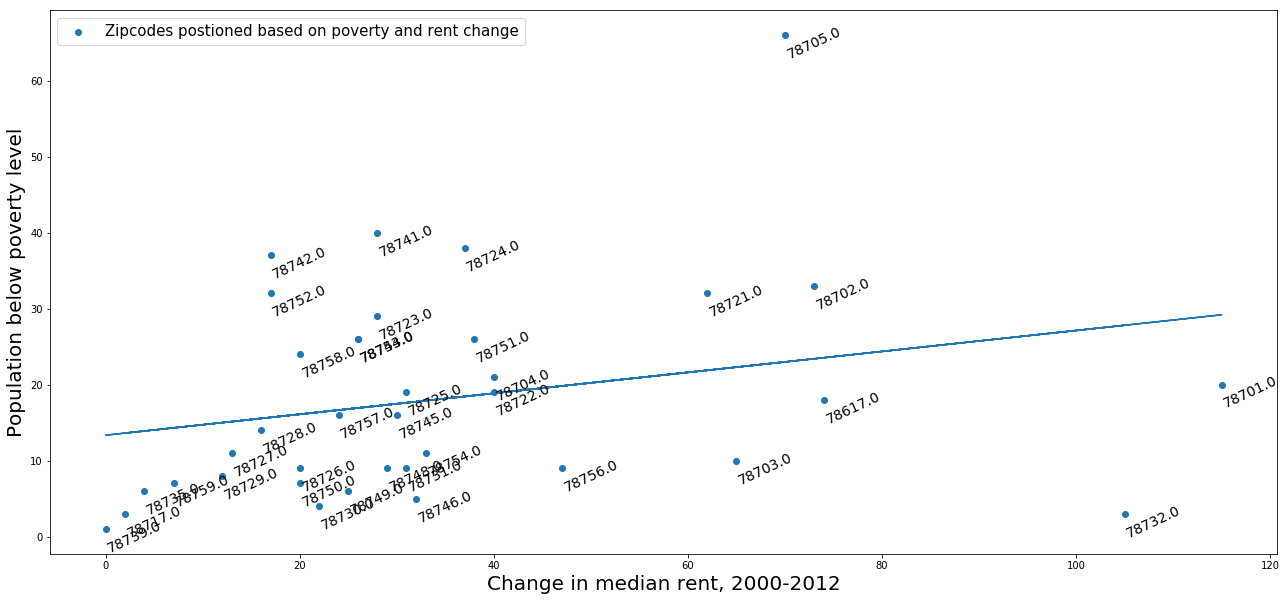

In [67]:
plt.figure(figsize=(22,10))
plt.xlabel('Change in median rent, 2000-2012',fontsize=20)
plt.ylabel('Population below poverty level',fontsize=20)

for idx, txt in (zip(xLables.index,xLables)):
    text = plt.annotate(txt, (X[idx], y[idx]),rotation=25)
    text = text.set_fontsize(14)
    
plt.scatter(X, y)
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(X, y, 1)
plt.legend(['Zipcodes postioned based on poverty and rent change'], 
           loc='upper left',
          fontsize=15)
plt.plot(X, b + m * X, '-')

We observe based on both the model's metrics as well as the figure that the relationship between the change in rent and  the poor population is not well explained with the variables under consideration.
That said, the figure is useful for outliers detection - for example, 78732, 78701 have experienced drastic rent changes, while there is relatively low number of population below poverty level - this might point at a reverse causation (not necessarily, but potentially) where the rent changes based on the popualtion and its ability to pay higher rent.

Further, let's take a closer look on 78732, 78701 , as well as 78705 that seems like an outlier as well:

![title](./Assets/austinInterestingZips.png)

Before investigation of those outliers, let's consider a model that captures the relatinoship between affordable housing and poverty levels:

In [83]:
model2 = linearModel.fit(X_train2,y_train2)
predictions = linearModel.predict(X_test2)

In [84]:
# The coefficients:
print('Coefficients: \n', linearModel.coef_)

from matplotlib.pyplot import plot as plt

Coefficients: 
 [[0.29053295]]


In [85]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect predictions:
print('Variance score: %.2f' % r2_score(y_test, predictions))

Mean squared error: 222.37
Variance score: 0.12


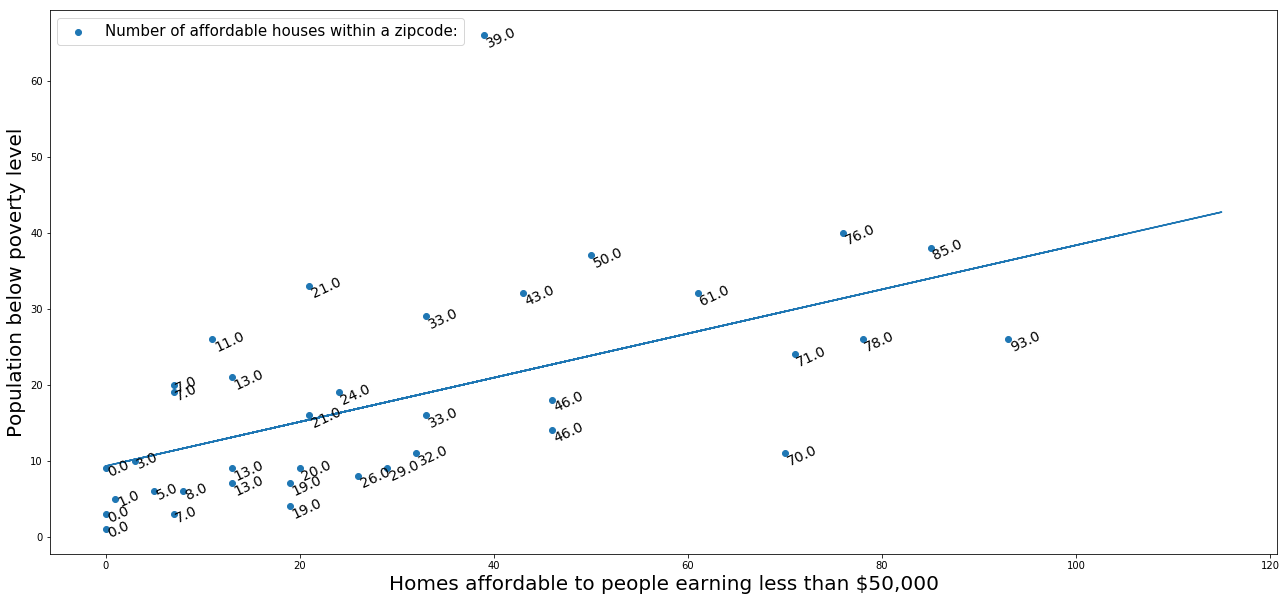

In [87]:
import matplotlib.pyplot as plt
xLables = housingDF['Homes affordable to people earning less than $50,000']
plt.figure(figsize=(22,10))
plt.xlabel('Homes affordable to people earning less than $50,000',fontsize=20)
plt.ylabel('Population below poverty level',fontsize=20)

for idx, txt in (zip(xLables.index,xLables)):
    text = plt.annotate(txt, (X2[idx], y[idx]),rotation=25)
    text = text.set_fontsize(14)
    
plt.scatter(X2, y)
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(X2, y, 1)
plt.legend(['Number of affordable houses within a zipcode:'], 
           loc='upper left',
          fontsize=15)
plt.plot(X, b + m * X, '-')

We see that as expected there is a positive correlation between affordable homes and poverty level. This is remarkebly important test we can run - we make sure that the market meets the need of the poorest population, i.e. that there is enough afforable housing where we would expect the population to need it. Worth noting though, there is quit a bit unexplained variance. There are numerous potential reasons to observe this variance (randomness, personal preference of investors and more). Let's perhaps combine the two to observe the zipcodes in which affordable housing is either problematic or just right:

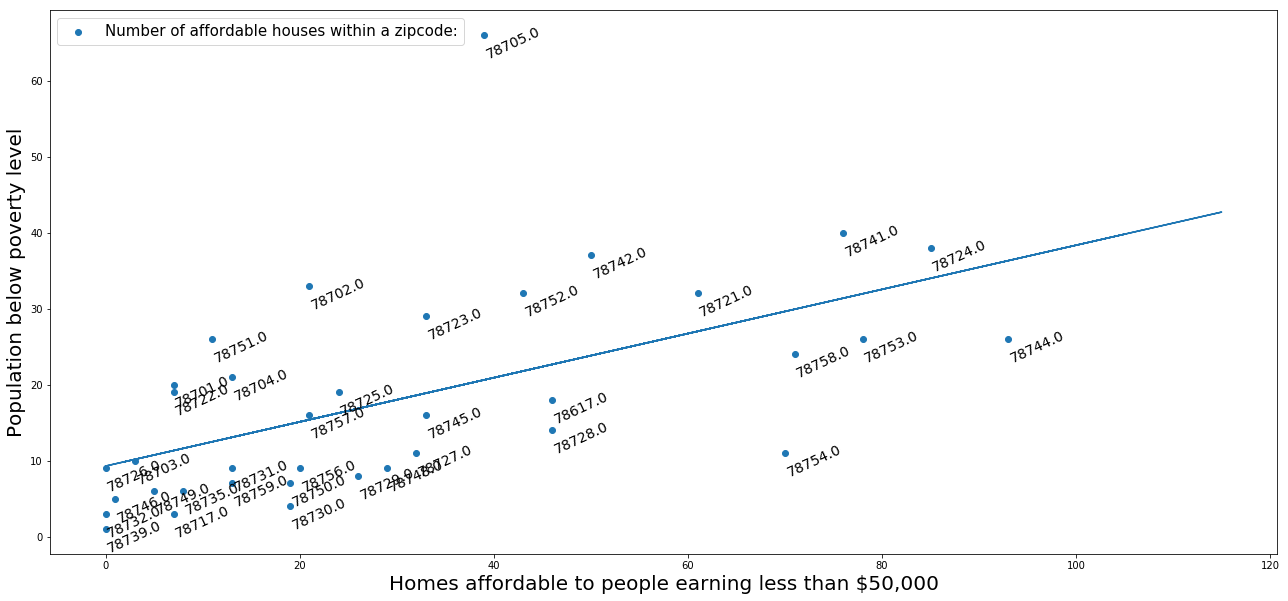

In [89]:
import matplotlib.pyplot as plt
xLables = housingDF['Zip Code']
plt.figure(figsize=(22,10))
plt.xlabel('Homes affordable to people earning less than $50,000',fontsize=20)
plt.ylabel('Population below poverty level',fontsize=20)

for idx, txt in (zip(xLables.index,xLables)):
    text = plt.annotate(txt, (X2[idx], y[idx]),rotation=25)
    text = text.set_fontsize(14)
    
plt.scatter(X2, y)
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(X2, y, 1)
plt.legend(['Number of affordable houses within a zipcode:'], 
           loc='upper left',
          fontsize=15)
plt.plot(X, b + m * X, '-')

The results worth noting that perhaps some kind of intervention would be helpful in the case of 78705. It could be assumed that there are missing affordable options for a population that is particularly poor.A quick google search sheds light: a native to Austin explains the problem with affordable housing within the city center (citation https://medium.com/code-for-america/our-plan-to-tackle-affordable-housing-in-austin-tx-87fbaf058dbd) and another look on a special report examining segregation accross the U.S. reveals the Austin is doing particularly poorly:
![report](./Assets/report.png)

Report citation here: http://martinprosperity.org/media/Segregated%20City.pdf

This perhaps is only a tiny part of the complex nature of the changing city. There is much more that can be discovered with this dataset. Relationship between rental prices and minority groups could be explored which might be relevant. This could have been interesting, however, I wanted to explore another dataset to have another source and maybe even integrate the results from the two. let's take a look at the shooring dataset:

In [68]:
shootingDF = pd.read_csv(SHOOTING)
shootingDF.head()

,:@computed_region_8spj_utxs,:@computed_region_a3it_2a2z,:@computed_region_q9nd_rr82,:@computed_region_qwte_z96m,call_type_categories,case,date,day_of_week,hits,less_lethal_force_used_by_apd_prior_to_shooting,location_1,location_1_address,location_1_city,location_1_state,location_1_zip,number_of_officer_shooters,officers_present_when_shots_fired,premise_category,subject_weapon,time
0,NaN,NaN,NaN,NaN,suicidal subject,16-1660189\n16-5024527,2016-06-14T00:00:00.000,Tue,1.0,No,NaN,6000 block Cougar Dr,NaN,NaN,NaN,1,21,Street,knife (machete),6:00 AM
1,8.0,3252.0,2.0,3764.0,shots fired,15-0381788\n15-5005471\n15-5006662,2015-02-08T00:00:00.000,Sun,1.0,No,POINT (-97.888612 30.244609),8206 Pax Dr,NaN,NaN,NaN,1,26,Yard/Courtyard,rifle,12:09 PM
2,NaN,7343.0,NaN,NaN,shots fired,14-3320160\n14-5052475,2014-11-28T00:00:00.000,Fri,1.0,No,POINT (-114.299949 48.192789),715 E 8th St,NaN,NaN,NaN,1,10,Street,rifle,2:22 AM
3,4.0,3646.0,9.0,3851.0,shots fired,13-5048070\n13-5048073\n13-2911294,2013-10-18T00:00:00.000,Fri,1.0,No,POINT (-97.704626 30.379773),1609 Cripple Creek Dr,NaN,NaN,NaN,3,5,Yard/Courtyard,rifle,3:20 PM
4,5.0,3259.0,1.0,NaN,other - nature unknown,17-0531372\n17-5015929\n17-5007713,2017-02-22T00:00:00.000,Wed,2.0,no,POINT (-97.810196 30.1955),7600 MANCHACA RD,NaN,NaN,NaN,1,1,wooded area,knife,6:16 PM


In [69]:
# let's observe the events happened only on streets:
streetOnly = shootingDF[shootingDF['premise_category']=='Street']
streetAndTime = streetOnly.loc[:,['location_1','time']]
streetAndTime

,location_1,time
0,NaN,6:00 AM
2,POINT (-114.299949 48.192789),2:22 AM
7,POINT (-80.089825 26.489341),4:50 PM
8,POINT (-91.944226 38.848634),2:10 AM
9,POINT (-85.348554 40.178357),7:51 AM
11,POINT (-97.856066 30.181796),6:53 AM
16,POINT (-97.689696 30.219623),4:26 AM
26,POINT (-97.583783 40.868762),11:07 PM
32,POINT (-97.740493 30.438023),10:53 PM


I have taken all the shootings (in orange), all the shooting on the street(green), <br>
and outliers zipcodes as defined before and put them all together on the interactive [map](https://oba2311.github.io/).

### Modeling - Assumptions and Limitations:
Indeed, the shortcomings of the models are described above but I wanted to stress out some assumptions made in regards to the models:
1. Linearity - linear regression is a basic tool that might be a good fit for data exploration, as this work is aimed at. That said, it is dangerous to conclude causality! There are multiple cuases for complex phenomena such as housing markets, and street shooting. 
2. As put by Daniel Kahneman - What You See is All There IS (Kahneman, 2011). We tend to overestiamte the power of the data we have at hand but once again there might be more of what we do not observe than what we actualy do!
3. Granularity - the models specifically, and quantitative urban-modeling in general can only use data as granular as can be found. That is to say that some of the complex relationships described here at the zipcode level well might actauly have to do with events happening at the street level and perhaps even specidic houses (especially when it comes to shooting...).
4. Scope of work - this work aims to probe the question at hand; there could be numerous variations and extensions, some of which I shall point at at the bottom.

### Data Visualization:
When creating the different figures I paid particular attention to data visualization principles. As described by Peter Aldhous (2016, http://paldhous.github.io/ucb/2016/dataviz/week2.html) data encoding should be considered carefully. I decided to integrate no more than three dimenssions into the figures, using only two axes and labels to generate visualizations that are easily digestable. Length for alligned items is the strongest (and easiet) way to compare quantities, in respect to cognitive aspects. Using a scater plot builds on this dimenssion. I avoided using different sizes for the scatter plots since area is a way that is less recommended for encoding of such examples.
Finally, I have plotted the data over a map since the discussion is about different areas of Austin - I wanted to create an interactive visualization where users could zoom in, and hover over the events. I emphasized the few events of shooting happening on the street to flash out possible correlation with the area of the event, but the data was too limited to reach conclusions.

### Extensions and Future Work:
There is a myriad of options that could be a decent extension for this work. Starting with exahusting the data provided here; there are many variables to be explored further and possible correlations. More granular data would have been good to have in order to overcome the granularity issues, such as cellular data. Agent-based models could be run against such data. Ideally, a qualitative approach could be added as another layer to reveal importnat characteristics of the city as a whole.

### Possible Interpretation:
As Calthorpe put it in his TED talked asisgned for class,  mixed-used, mixed-income, walkable streets are key for a prosperous city (Calthorpe, 2017). The data explored here illustrates that there is still some work to be done to decrease levels of segregation within Austin. This data snapshot together with ongoing trends pushing the city to be more liberal, but also more sprawl-like (http://www.austintexas.gov/page/top-ten-demographic-trends-austin-texas) would put Austin in the next decade in an interesting intersection from which it could go either into another urban sprawl, or rather into a smarter, more integrated mixed city.

### HCs / LOs:
I have tried to address the following LOs quite explicitely:
 * DatavizandCom 
 * UrbanData

And to build on the following LOs with the interpretation and 
* UrbanModelling
* UrbanTheory


### References:
1. Calthorpe, 2017 https://www.youtube.com/watch?v=IFjD3NMv6Kw)


### All the code for this project lives in:
1. https://github.com/oba2311/oba2311.github.io and
2. https://github.com/oba2311/UrbanModelling-Segragation